<a href="https://colab.research.google.com/github/Kittx3D/YOLO/blob/main/YOLO_v4_Detec%C3%A7%C3%A3o_de_objetos_com_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detectando objetos com YOLO v4 - implementação com OpenCV

## Etapa 1 - Importando as bibliotecas

In [1]:
import cv2
print(cv2.__version__)

4.7.0


In [ ]:
!pip install opencv-python==4.4.0.40

     |████████████████████████████████| 49.4MB 80kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [2]:
import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import zipfile
print(cv2.__version__)

4.7.0


## Etapa 2 - Conectando com o Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Etapa 3 - Carregando os arquivos do modelo treinado

In [4]:
path = '/content/gdrive/MyDrive/YOLO-TESTE/modelo_YOLOv4.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [5]:
labels_path = os.path.sep.join(['/content/cfg', 'coco.names'])
labels_path

'/content/cfg/coco.names'

In [6]:
LABELS = open(labels_path).read().strip().split('\n')
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
len(LABELS)

80

In [8]:
weights_path = os.path.sep.join(['/content', 'yolov4.weights'])
config_path = os.path.sep.join(['/content/cfg', 'yolov4.cfg'])
weights_path, config_path

('/content/yolov4.weights', '/content/cfg/yolov4.cfg')

In [9]:
net = cv2.dnn.readNet(config_path, weights_path)

In [10]:
net

< cv2.dnn.Net 0x7fcf88fdf3f0>

## Etapa 4 - Definindo mais configurações para a detecção 

In [11]:
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype='uint8')
print(COLORS)

[[102 212 246]
 [169  12 229]
 [234 212   1]
 [195 186 117]
 [ 85  35 233]
 [160 217 227]
 [254 100  39]
 [ 40 185 218]
 [244  87 119]
 [154 157  88]
 [245  92 191]
 [124 140 188]
 [ 18 254 148]
 [ 36  94  25]
 [ 93 119  28]
 [ 69 119 152]
 [233  47  80]
 [101  33  85]
 [253 151  45]
 [248 238 106]
 [123 181 166]
 [ 78  43 102]
 [ 90 241 250]
 [  2 147  69]
 [103 205 198]
 [170 171 239]
 [214 125  79]
 [250 173  45]
 [203  47 171]
 [ 27 146 247]
 [167  36  98]
 [ 94 211 128]
 [228  30 194]
 [236 203 111]
 [181   9  56]
 [177 145   4]
 [ 77  40 115]
 [123 147   4]
 [141 181 123]
 [ 65 246 240]
 [ 21 124  95]
 [ 35 156 122]
 [223 107  49]
 [225  16  28]
 [172 123 181]
 [ 64  82  87]
 [135 196 200]
 [122   4 220]
 [127 227  59]
 [ 32 185  97]
 [238  27 216]
 [251 215 178]
 [194 131  34]
 [196   3 234]
 [208  89  58]
 [126  58 216]
 [ 27 151  75]
 [212 243 206]
 [ 86 181 195]
 [104  55 129]
 [ 96  21 217]
 [241  96 165]
 [ 62  10 197]
 [ 17 147  28]
 [186  15 154]
 [ 91   1  48]
 [  5 176 

In [12]:
ln = net.getLayerNames()
print('Todas as camadas')
print(ln)
print('Total de camadas: ' + str(len(ln)))

Todas as camadas
('conv_0', 'bn_0', 'mish_1', 'conv_1', 'bn_1', 'mish_2', 'conv_2', 'bn_2', 'mish_3', 'identity_3', 'conv_4', 'bn_4', 'mish_5', 'conv_5', 'bn_5', 'mish_6', 'conv_6', 'bn_6', 'mish_7', 'shortcut_7', 'conv_8', 'bn_8', 'mish_9', 'concat_9', 'conv_10', 'bn_10', 'mish_11', 'conv_11', 'bn_11', 'mish_12', 'conv_12', 'bn_12', 'mish_13', 'identity_13', 'conv_14', 'bn_14', 'mish_15', 'conv_15', 'bn_15', 'mish_16', 'conv_16', 'bn_16', 'mish_17', 'shortcut_17', 'conv_18', 'bn_18', 'mish_19', 'conv_19', 'bn_19', 'mish_20', 'shortcut_20', 'conv_21', 'bn_21', 'mish_22', 'concat_22', 'conv_23', 'bn_23', 'mish_24', 'conv_24', 'bn_24', 'mish_25', 'conv_25', 'bn_25', 'mish_26', 'identity_26', 'conv_27', 'bn_27', 'mish_28', 'conv_28', 'bn_28', 'mish_29', 'conv_29', 'bn_29', 'mish_30', 'shortcut_30', 'conv_31', 'bn_31', 'mish_32', 'conv_32', 'bn_32', 'mish_33', 'shortcut_33', 'conv_34', 'bn_34', 'mish_35', 'conv_35', 'bn_35', 'mish_36', 'shortcut_36', 'conv_37', 'bn_37', 'mish_38', 'conv_38

In [13]:
print('Camadas de saída')
print(net.getUnconnectedOutLayers())

Camadas de saída
[327 353 379]


**`[ ! ] Atenção:`** se estiver executando na versão 3.10 do Python (ou superior) troque a linha abaixo por: 
> `ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]`

In [14]:
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
ln

['yolo_139', 'yolo_150', 'yolo_161']

## Etapa 5 - Carregando a imagem onde será feita a detecção

In [15]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

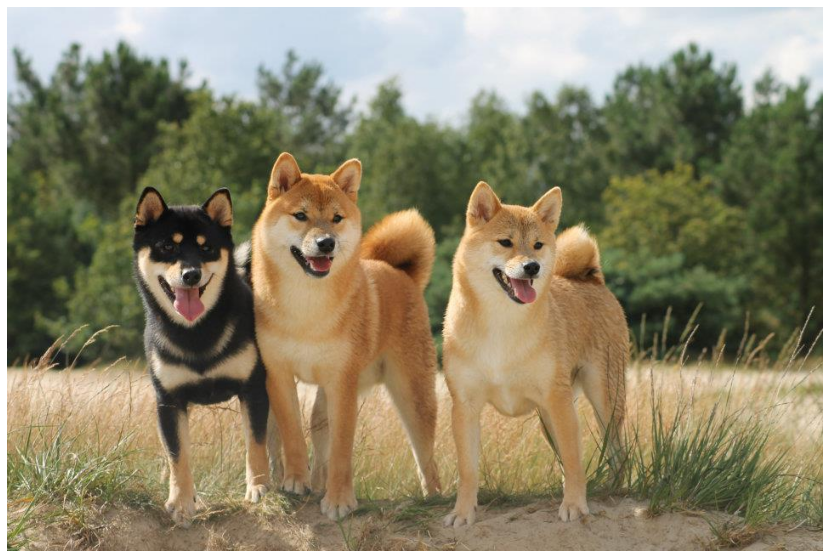

In [16]:
imagem = cv2.imread('/content/gdrive/MyDrive/YOLO-TESTE/cachorros.jpg')
mostrar(imagem)

In [17]:
type(imagem)

numpy.ndarray

In [ ]:
print(imagem)

[[[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [230 227 222]
  [230 227 222]
  [230 227 222]]

 [[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [231 228 223]
  [231 228 223]
  [231 228 223]]

 [[240 232 225]
  [240 232 225]
  [240 232 225]
  ...
  [232 229 224]
  [232 229 224]
  [232 229 224]]

 ...

 [[104 138 131]
  [ 80 114 107]
  [ 69 106  98]
  ...
  [111 132 147]
  [105 126 141]
  [ 89 110 125]]

 [[114 148 141]
  [117 151 144]
  [108 145 135]
  ...
  [124 147 163]
  [125 148 164]
  [123 146 162]]

 [[ 49  83  76]
  [ 67 102  92]
  [ 67 104  94]
  ...
  [ 73  96 112]
  [ 68  91 107]
  [ 73  96 112]]]


In [19]:
imagem_cp = imagem.copy()

In [20]:
imagem.shape

(640, 960, 3)

In [21]:
(H, W) = imagem.shape[:2]
print('Altura: ' + str(H) + '\nLargura: ' + str(W))

Altura: 640
Largura: 960


## Etapa 6 - Processando a imagem de entrada

In [26]:
inicio = time.time() #Recebe o horário inicial do processamento

blob = cv2.dnn.blobFromImage(imagem, 1 / 255.0, (416, 416), swapRB = True, crop = False) # Convertendo a imagem para blob com o recurso dnn.blobFromImage. Esse formato é necessário para passarmos a imagem para a rede neural
# Quando formos trabalhar com redes neurais, é necessário definirmos o tamanho padrão das imagens. 
# No caso do YOLO o padrão é 416,416 ou 608, 608
# Sempre que for necessário utilizar uma nova tecnologia para definição de imagem é necessário estudar.
# swapRB = faz a inverão do RGB para o BGR
# crop = False -> impede que a imagem seja cortada

net.setInput(blob) # fazendo a passagem da imagem para a rede neural
layer_outputs = net.forward(ln) # camadas de saída.

# a função forward envia a imagem para a primeira camada de convolução, faz toda a verificação e depois retorna o output

termino = time.time()#Recebe o horário final do processamento
print('YOLO levou {:.2f} segundos'.format(termino - inicio))

YOLO levou 1.61 segundos


## Etapa 7 - Definindo as variáveis

In [27]:
# Definindo variáveis que irão nortear o modelo de detecção
threshold = 0.5 
threshold_NMS = 0.3 # Obtem a probabilidade da classe e remove as caixas com baixa probabilidade e de área compartilhada
caixas = [] # Caixas delimitadoras que irão agrupar os objetos avaliados
confiancas = [] # Confiabilidade das previsões
IDclasses = [] # Classes.

## Etapa 8 - Realizando a predição

In [ ]:
len(layer_outputs)

3

In [29]:
layer_outputs[0], len(layer_outputs[0]) # Indica a primeira escala de previsão

(array([[0.0110055 , 0.01021741, 0.0226476 , ..., 0.        , 0.        ,
         0.        ],
        [0.01492387, 0.01543285, 0.03303421, ..., 0.        , 0.        ,
         0.        ],
        [0.01701079, 0.01489793, 0.05110347, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9912933 , 0.99049157, 0.02108762, ..., 0.        , 0.        ,
         0.        ],
        [0.98667467, 0.98426443, 0.03099852, ..., 0.        , 0.        ,
         0.        ],
        [0.9830682 , 0.985908  , 0.05975069, ..., 0.        , 0.        ,
         0.        ]], dtype=float32), 8112)

In [30]:
layer_outputs[1]# Indica a segunda escala de previsão conforme a figura da arquitetura no slide

array([[0.03031924, 0.0320847 , 0.10433268, ..., 0.        , 0.        ,
        0.        ],
       [0.03298569, 0.03253503, 0.13059244, ..., 0.        , 0.        ,
        0.        ],
       [0.03123863, 0.03151361, 0.15157273, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96770096, 0.96682906, 0.06866268, ..., 0.        , 0.        ,
        0.        ],
       [0.96435654, 0.96775067, 0.09513645, ..., 0.        , 0.        ,
        0.        ],
       [0.9661032 , 0.9677124 , 0.10772233, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [31]:
layer_outputs[2], layer_outputs[2][0], len(layer_outputs[2][0])# Indica a terceira escala de previsão conforme a figura da arquitetura no slide

(array([[0.06402362, 0.06951448, 0.15857807, ..., 0.        , 0.        ,
         0.        ],
        [0.06164714, 0.05672131, 0.31426796, ..., 0.        , 0.        ,
         0.        ],
        [0.03240772, 0.05009155, 0.74589056, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.93245447, 0.9313108 , 0.20663446, ..., 0.        , 0.        ,
         0.        ],
        [0.9336966 , 0.93029344, 0.2977226 , ..., 0.        , 0.        ,
         0.        ],
        [0.95123345, 0.95295554, 0.5208084 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([6.4023621e-02, 6.9514476e-02, 1.5857807e-01, 3.4840056e-01,
        4.2169717e-07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0

In [ ]:
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [35]:
LABELS[16]

'dog'

In [32]:
np.argmax(np.array([0.10, 0.80, 0.10])) # Obtem o índice do maior argumento para associarmos a classe

1

In [33]:
teste = np.array([0.10, 0.80, 0.10]) 

In [34]:
teste[1] # busca o valor da porcentagem de confiânça.

0.8

In [36]:
# Para execução, será necessário que façamos a busca manualmente dos valores da bouding box
for output in layer_outputs: # Percorre as camadas de saída da rede neural
  for detection in output: # Percorre cada uma das detecções
    scores = detection[5:] # Acessa a detecção a partir da 5º variável
    classeID = np.argmax(scores) # Obtem o indice do maior valor para poder indicar a classe
    confianca = scores[classeID] # busca a porcentagem de confiânça.
    if confianca > threshold: 
      print('scores: ' + str(scores))
      print('classe mais provável: ' + str(classeID))
      print('confiança: ' + str(confianca))

    
      caixa = detection[0:4] * np.array([W, H, W, H]) #Pega as informações iniciais (Pc, Bx, By, Bh, Bw) para redimensionar e montar a boundig box do tamanho da imagem
      (centerX, centerY, width, height) = caixa.astype('int')# Armazena os valores das caixas delimitadoras

      x = int(centerX - (width / 2)) # Obtem o valor do X
      y = int(centerY - (height / 2))# Obtem o valor do Y 

      #Obtem o valor das duas variáveis para desenhar o retângulo na imagem

      caixas.append([x, y, int(width), int(height)])
      confiancas.append(float(confianca))
      IDclasses.append(classeID)

scores: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.60595423 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
classe mais provável: 16
confiança: 0.60595423
scores: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.     

In [37]:
print(caixas), len(caixas)

[[145, 200, 186, 380], [275, 165, 235, 438], [141, 205, 189, 397], [274, 195, 235, 405], [495, 207, 237, 402], [497, 216, 235, 411], [279, 174, 230, 417], [280, 173, 228, 420], [134, 204, 169, 401], [137, 204, 164, 401], [142, 210, 179, 389], [142, 208, 178, 391], [277, 196, 234, 402], [277, 193, 234, 408], [502, 208, 231, 404], [504, 207, 230, 406]]


(None, 16)

In [38]:
print(confiancas), len(confiancas)

[0.6059542298316956, 0.9570453763008118, 0.8891246318817139, 0.9090495109558105, 0.9525657296180725, 0.7894694805145264, 0.9860402345657349, 0.9869316816329956, 0.6623752117156982, 0.6959596276283264, 0.9729039072990417, 0.9767161011695862, 0.8875227570533752, 0.897688627243042, 0.9810122847557068, 0.9824250936508179]


(None, 16)

In [39]:
print(IDclasses), len(IDclasses)

[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


(None, 16)

## Etapa 9 - Aplicando a Non-Maxima Suppression

In [40]:
#INICIANDO A APLICAÇÃO DO NMS
objs = cv2.dnn.NMSBoxes(caixas, confiancas, threshold, threshold_NMS) # O recurso NMS retorna as caixas com a maior porcentagem de confiânça 

In [41]:
objs

array([ 7, 15, 11], dtype=int32)

In [42]:
print(objs.flatten())

[ 7 15 11]


In [43]:
confiancas[7], confiancas[15], confiancas[11]

(0.9869316816329956, 0.9824250936508179, 0.9767161011695862)

In [44]:
confiancas[0]

0.6059542298316956

## Etapa 10 - Mostrando o resultado da detecção na imagem

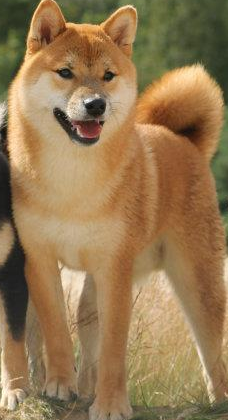

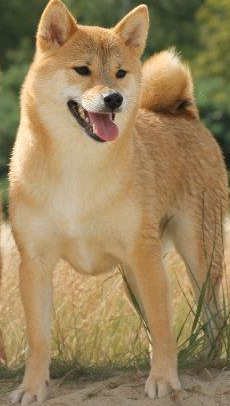

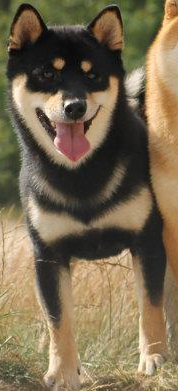

In [45]:
if len(objs) > 0:
  for i in objs.flatten(): # esse comando retira os dados da matriz e transforma em vetor
    (x, y) = (caixas[i][0], caixas[i][1]) # Percorre cada um dos índices e extrai a coordendada das caixas de detecção do X e Y
    (w, h) = (caixas[i][2], caixas[i][3]) # Percorre cada um dos índices e extrai a coordendada das caixas de detecção do W e H

    # Utilizando as coordenadas dos objetos encontrados, iremos recotrar as imagens nessas coordenadas para podermos exibi-los
    objeto = imagem_cp[y:y + h, x:x + w]
    cv2_imshow(objeto)

    cor = [int(c) for c in COLORS[IDclasses[i]]] # Pega a cor de acordo com a classe do objeto

    cv2.rectangle(imagem, (x, y), (x + w, y + h), cor, 2) # Faz a criação do balding box
    texto = "{}: {:.4f}".format(LABELS[IDclasses[i]], confiancas[i]) #Passamos o Id da classe e a confiânça
    cv2.putText(imagem, texto, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, cor, 2) # Define o texto na parte de cima

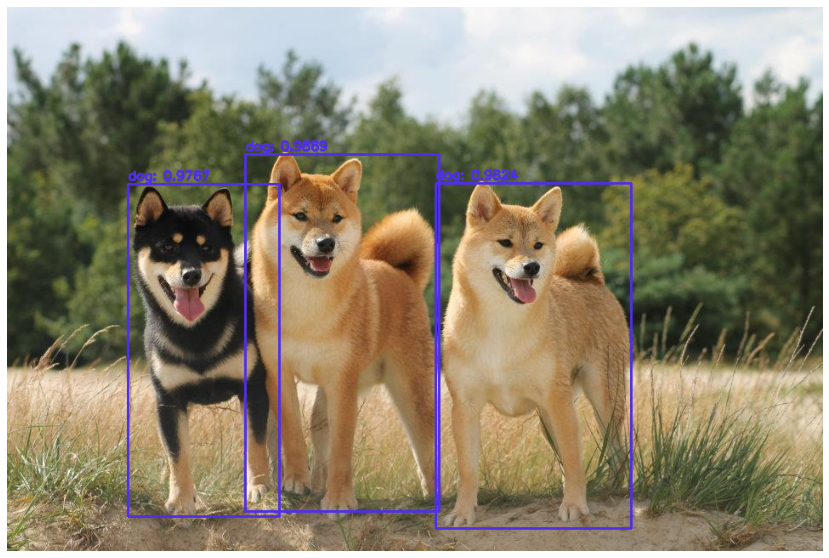

In [46]:
mostrar(imagem)

In [47]:
cv2.imwrite('resultado.jpg', imagem) # Faz o save da imagem

True

In [48]:
!cp ./resultado.jpg /content/gdrive/MyDrive/YOLO-TESTE/resultado_cachorro.jpg # Copia a imagem para o Gdrive